In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Training the model using the data we collected

![alt text](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/amer_sign2.png "Amer Sign")




In [ ]:
# Load our libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [ ]:
# Get our Training and Test Data
train = pd.read_csv('/content/drive/MyDrive/train_data_all.csv')
test = pd.read_csv('/content/drive/MyDrive/test_data_all.csv')

In [ ]:
# Inspect our Training data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel4086,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get our training labels
labels = train['label'].values

In [ ]:
# View the unique labels, 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
# Plot the quantities in each class
#plt.figure(figsize = (18,8))
#sns.countplot(x =labels)

In [ ]:
# Drop Training Labels from our training data so we can separate it 
train.drop('label', axis = 1, inplace = True)

In [ ]:
# Extract the image data from each row in our csv, remember it's in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (64, 64)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
# hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [ ]:
# View our labels
labels
# len(labels[0])

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


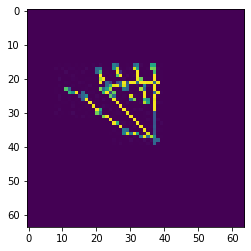

In [ ]:
# Inspect an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(64,64))

In [ ]:
# Use OpenCV to view 10 random images from our training data
#import cv2
#import numpy as np

#for i in range(0,10):
#    rand = np.random.randint(0, len(images))
#    input_im = images[rand]

#    sample = input_im.reshape(28,28).astype(np.uint8)
#    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
#    cv2.imshow("sample image", sample)
#    cv2.waitKey(0) 
    
#cv2.destroyAllWindows()

In [ ]:
# Split our data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [ ]:
# Start loading our tensorFlow modules and define our batch size etc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 25
epochs = 30

In [ ]:
# Scale our images
x_train = x_train / 255
x_test = x_test / 255

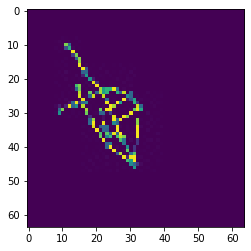

In [ ]:
# Reshape them into the size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0], 64, 64, 1)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 1)

plt.imshow(x_train[0].reshape(64,64))

In [ ]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(64, 64 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
# Compile our Model
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [ ]:
# Train our Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/30
137/137 [==============================] - 14s 40ms/step - loss: 1.6526 - accuracy: 0.5173 - val_loss: 0.5105 - val_accuracy: 0.8521
Epoch 2/30
137/137 [==============================] - 5s 36ms/step - loss: 0.4546 - accuracy: 0.8601 - val_loss: 0.2391 - val_accuracy: 0.9305
Epoch 3/30
137/137 [==============================] - 4s 31ms/step - loss: 0.2462 - accuracy: 0.9201 - val_loss: 0.1550 - val_accuracy: 0.9535
Epoch 4/30
137/137 [==============================] - 4s 31ms/step - loss: 0.1464 - accuracy: 0.9520 - val_loss: 0.1106 - val_accuracy: 0.9649
Epoch 5/30
137/137 [==============================] - 5s 36ms/step - loss: 0.1086 - accuracy: 0.9650 - val_loss: 0.0957 - val_accuracy: 0.9729
Epoch 6/30
137/137 [==============================] - 4s 31ms/step - loss: 0.0842 - accuracy: 0.9722 - val_loss: 0.0917 - val_accuracy: 0.9723
Epoch 7/30
137/137 [==============================] - 5s 36ms/step - loss: 0.0667 - accuracy: 0.9777 - val_loss: 0.0709 - val_accuracy: 0.979

In [ ]:
# Save our Model
model.save("model.h5")
print("Model Saved")

Model Saved


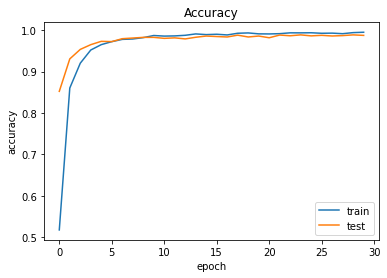

In [ ]:
# View our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
# Reshape our test data so that we can evaluate it's performance on unseen data
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (64, 64)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 64, 64, 1)

test_images.shape

y_pred = model.predict(test_images)

40/40 [==============================] - 0s 5ms/step


In [ ]:
# Get our accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.932